In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Book1.csv")

In [3]:
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


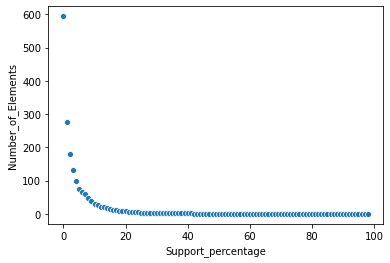

In [4]:
da=[]
for i in range(1,100,+1):
    i=i/100
    frequent_itemsets = apriori(data, min_support= i,use_colnames=True)
    da.append(frequent_itemsets.shape[0])
da=pd.DataFrame(da)
da=da.reset_index()
da=da.rename({0:'Number_of_Elements','index':'Support_percentage'},axis=1)
sns.scatterplot(data=da,x='Support_percentage',y='Number_of_Elements')

#change support value to see changes in confidence/lift.

In [5]:
frequent_itemsets = apriori(data, min_support= 0.10,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


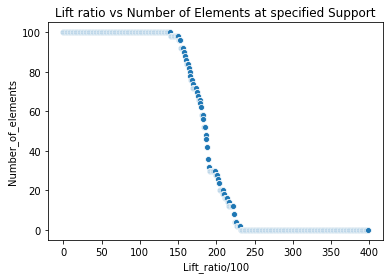

In [22]:
dat=[]
for i in range(1,400,1):
    i=i/100
    rules1= association_rules(frequent_itemsets, metric='lift', min_threshold=i)
    dat.append(rules1.shape[0])
dat=pd.DataFrame(dat)
dat=dat.reset_index()
dat=dat.rename({'index':'Lift_ratio/100',0:'Number_of_elements'},axis=1)
sns.scatterplot(data=dat,x='Lift_ratio/100',y='Number_of_elements')
plt.title('Lift ratio vs Number of Elements at specified Support')
plt.show()

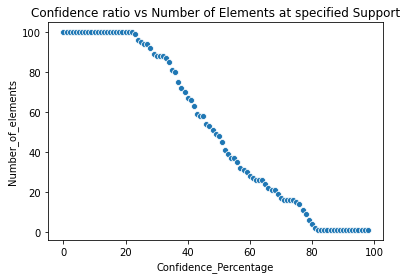

In [21]:
dat_C=[]
for i in range(1,100,1):
    i=i/100
    rules2= association_rules(frequent_itemsets, metric='confidence', min_threshold=i)
    dat_C.append(rules2.shape[0])
dat_C=pd.DataFrame(dat_C)
dat_C=dat_C.reset_index()
dat_C=dat_C.rename({'index':'Confidence_Percentage',0:'Number_of_elements'},axis=1)
sns.scatterplot(data=dat_C,x='Confidence_Percentage',y='Number_of_elements')
plt.title('Confidence ratio vs Number of Elements at specified Support')
plt.show()

In [8]:
rules= association_rules(frequent_itemsets, metric='lift', min_threshold=2)
rules=rules.reset_index()
rules


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,1,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
2,2,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
3,3,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
4,4,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
5,5,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
6,6,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
7,7,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
8,8,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
9,9,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974


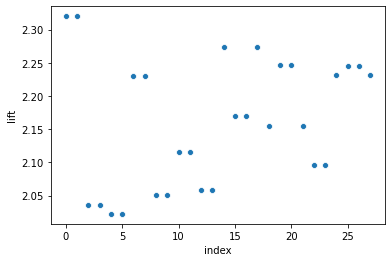

In [23]:
sns.scatterplot(data=rules,x='index',y='lift')
plt.show()

In [10]:
#this pairs shows the repetision of data points 

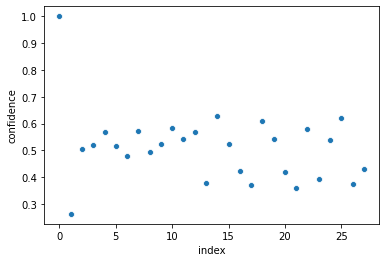

In [24]:
sns.scatterplot(data=rules,x='index',y='confidence')
plt.show()